In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt5
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from read_data import *
import numpy as np
import os
import math

pd.set_option('display.max_rows', 1000)

# Generic plotting configurations
plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('ggplot')

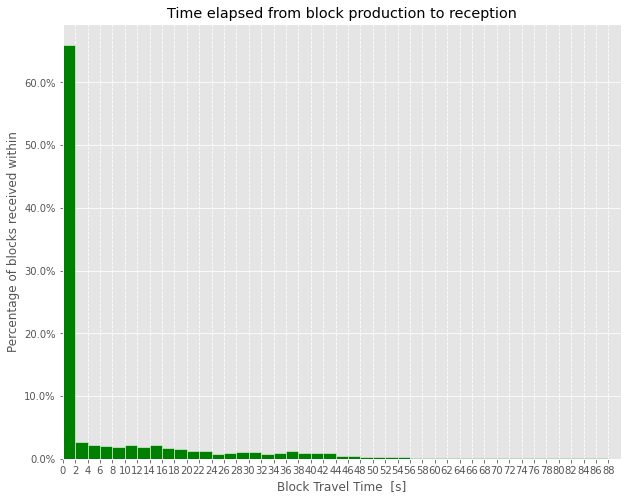

In [19]:
# Select which experiments to plot
EXP = 'test'
NREP = ['011']
# Collect data
df = create_df(EXP, 'block')
# df = df.query("NROB in @NROB")
df = df.query("NREP in @NREP")

# Create figure
xmax = math.ceil(df['TELAPSED'].max()/10)*10
bins = range(0,xmax,2)
xticks = range(0,xmax,2)

ax = plt.axes()
ax.grid(axis='x', linestyle='--') # vertical lines
ax.set_xticks(xticks) 
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

hist, bins = np.histogram(df['TELAPSED'], bins=bins)
ax.bar(bins[:-1]+(bins[1]-bins[0])/2, hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='green', edgecolor='w')
ax.set_xlim(xmin=0,xmax = xmax)
ax.set_title('Time elapsed from block production to reception')
ax.set_xlabel('Block Travel Time  [s]')
ax.set_ylabel('Percentage of blocks received within')
# ax = df['TELAPSED'].plot.hist(color='green', bins=bins, xticks=xticks)
plt.show()

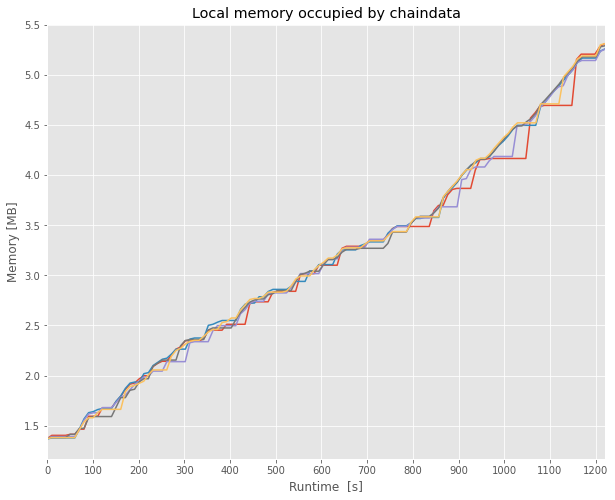

In [73]:
# Select which experiments to plot
EXP = 'test'
ID = [1]
NREP = ['011']
# Collect data
df = create_df(EXP, 'extra')
# df = df.query("ID in @ID")
df = df.query("NREP in @NREP")

# Create figure
xmax = math.ceil(df['TIME'].max())
xticks = range(0,xmax,100)

ax = plt.axes()
df['MB'] = df['MB']*10e-6
df.set_index(['TIME']).groupby(['ID'])['MB'].plot(ax = ax)

ax.set_xlim(xmin=0,xmax = xmax)
ax.set_xticks(xticks) 
ax.set_title('Local memory occupied by chaindata')
ax.set_xlabel('Runtime  [s]')
ax.set_ylabel('Memory [MB]')

plt.show()

Text(0.5, 0, 'Time [ms]')

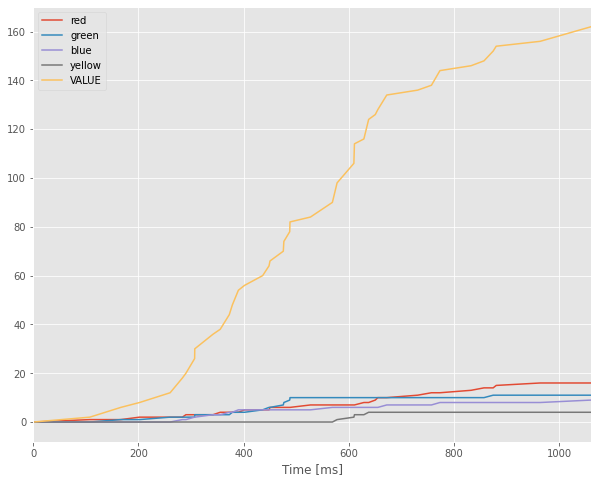

In [26]:
# Select which experiments to plot
EXP = 'test'
NREP = ['008']

# Collect data
df = create_df(EXP, 'loop_function')
df = df.query("NREP in @NREP")

# Perform corrections
df = df.append(pd.Series(0, index=df.columns), ignore_index=True).sort_values('TIME')

# Create figure
ax = plt.axes()
df.set_index(['TIME'])[['red','green', 'blue', 'yellow', 'VALUE']].plot(ax = ax)
ax.set_xlim(xmin=0,xmax = df['TIME'].max())
ax.set_xlabel('Time [ms]')


In [ ]:
# Select which experiments to plot
EXP = 'test'
NREP = ['007']

# Collect data
df = create_df(EXP, 'simulation')
df = df.query("NREP in @NREP")

# Perform corrections
df = df.append(pd.Series(0, index=df.columns), ignore_index=True).sort_values('TIME')

# Create figure
ax = plt.axes()
# df.set_index(['TIME'])[['FPS']].hist(ax = ax)

# Create figure
bins = np.array(range(0,12,1))/100
xticks = np.array(range(0,12,1))/100

ax = plt.axes()
ax.grid(axis='x', linestyle='--') # vertical lines
ax.set_xticks(xticks) 
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

hist, bins = np.histogram(df['FPS'], bins=bins)
ax.bar(bins[:-1]+(bins[1]-bins[0])/2, hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='green', edgecolor='w')

ax.set_xlim(xmin=0,xmax=0.12)
# ax.set_ylim(ymin=0,ymax = 0.2)

In [24]:
# Select which experiment to plot
EXP = 'test'
NREP = ['003']
# NROB = [8]
# NBYZ = [0]

# Collect data
df = create_df(EXP, 'estimate')
df = df.query("NROB in @NROB")
df = df.query("NREP in @NREP")

# Create figure
ax = plt.axes()

# Plot actual value
handle1 = plt.axhline(0.25, color='k', linestyle='--', linewidth=1.5)
# Plot each robot estimate
handle2 = df.set_index(['TIME']).groupby(['ID'])['ESTIMATE'].plot(color='grey', alpha=0.25)
handle2.label = 'Robot Estimates'
# Plot mean of robot estimates 
handle3 = df[['TIME', 'ESTIMATE']].sort_values('TIME').reset_index().groupby(df.index // NROB).mean().set_index('TIME')['ESTIMATE'].plot(color='r', linestyle='--', linewidth=2.5)
handle3.label = 'Robot Estimates (Mean, incl. Byzantines)'
# Plot excluding Byzantines
handle4 = df[['TIME', 'ESTIMATE']].sort_values('TIME').reset_index().replace(0,np.NaN).groupby(df.index // NROB).mean().set_index('TIME')['ESTIMATE'].plot(color='b', linestyle='--', linewidth=2.5)
handle4.label = 'Robot Estimates (Mean, excl. Byzantines)'

df = create_df(EXP, 'sc')
df = df.query("NROB in @NROB")
df = df.query("NREP in @NREP")

df['BSTAMPS'] = df['BLOCK'].mul(15*1000) 
df['MEAN'] = df['MEAN'].div(10000000) 
handle5 = df.groupby(['BLOCK'])[['BSTAMPS', 'MEAN']].max().set_index('BSTAMPS').plot(ax=ax, color='g', linestyle='--', linewidth=2.5)
handle5.label = 'Blockchain Estimate'

# Edit figure looks
ax.set_ylim(ymin=0, ymax=0.5)
ax.set_title('Experiment_{} || {}rob-{}byz-{}'.format(EXP, NROB, NBYZ, NREP), fontsize=18)
# ax.legend()
plt.show()

UndefinedVariableError: name 'NROB' is not defined

In [ ]:
# Select which experiment to plot
EXP = 'G9'
NREP = range(0,20)
NROB = [8,16,24]

# Collect data
df = create_df(EXP, 'sc')
df = df.query("NROB in @NROB")
df = df.query("NREP in @NREP")

# Create figure
fig, ax = plt.subplots(1,2, figsize=(20, 8))

# Big group for each box: Number of robots
boxes = df.groupby('NROB')

print(df)

### IMPORTANT !!!!

### THIS COLUMN IS COMPLETELY WRONG! BECAUSE OF A SHIFT IN THE CSV HEADER !!! ###

### THEREFORE JUST USE IT FOR TODAY'S MEETING !!! ###

for x, box in boxes:
    errors = box.sort_values('TIME').groupby('NREP')['#ROBOT'].agg(['last']) # not 100% correct yet
    errors = errors.div(10000000).sub(0.25).abs().mul(100)
    print(errors['last'])
    #print("Error is", x,errors)

    cts = box[(box['R?']==True)].sort_values('TIME').groupby('NREP')['TIME'].agg(['first'])
    cts = cts.div(1000)
    #print(cts)
    
    # Plot boxplots for errors
    ax[0].boxplot(errors['last'], positions=[x/10])
    # Plot boxplots for consensus times
    ax[1].boxplot(cts['first'], positions=[x/10])
    
# Edit figure looks
ax[0].set_ylim(ymin=0, ymax=10)
ax[1].set_ylim(ymin=0, ymax=1000)
ax[0].set_xticklabels(NROB)
ax[1].set_xticklabels(NROB)
ax[0].set_ylabel('Error (%)')
ax[1].set_ylabel('Time to Consensus (s)')
ax[0].set_xlabel('Number of Robots')
ax[1].set_xlabel('Number of Robots')
plt.savefig("sim_experiment_9.png")
plt.show()


In [ ]:
# Select which experiment to plot
EXP = 'G1'
NREP = range(0,20)
NROB = [24]
NBYZ = [0, 3, 6, 9, 12]

# Collect data
df = create_df(EXP, 'sc')
df = df.query("NROB in @NROB")
df = df.query("NREP in @NREP")
df = df.query("NBYZ in @NBYZ")

# Create figure
fig, ax = plt.subplots(1,2, figsize=(20, 8))

# Big group for each box: Number of robots
boxes = df.groupby('NBYZ')

#print(df)

for x, box in boxes:
    errors = box.sort_values('TIME').groupby('NREP')['MEAN'].agg(['last']) # not 100% correct yet
    errors = errors.div(10000000).sub(0.25).abs().mul(100)
    #print(errors['last'])
    #print("Error is", x,errors)

    cts = box[(box['C?']==True)].sort_values('TIME').groupby('NREP')['TIME'].agg(['first'])
    cts = cts.div(1000)
    #print(cts)
    
    # Plot boxplots for errors
    ax[0].boxplot(errors['last'], positions=[x/10])
    # Plot boxplots for consensus times
    ax[1].boxplot(cts['first'], positions=[x/10])
    
# Edit figure looks
ax[0].set_ylim(ymin=0, ymax=25)
ax[1].set_ylim(ymin=0, ymax=6000)
ax[0].set_xticklabels(NBYZ)
ax[1].set_xticklabels(NBYZ)
ax[0].set_ylabel('Error (%)')
ax[1].set_ylabel('Time to Consensus (s)')
ax[0].set_xlabel('Number of Robots')
ax[1].set_xlabel('Number of Robots')
plt.savefig("sim_experiment_1.png")
plt.show()


In [ ]:
# Select which experiment to plot
EXP = 'G9'
NREP = [1]
NROB = [8]
pd.set_option('display.max_rows', 5000)

# Collect data
df = create_df(EXP, 'sc')
df = df.query("NROB in @NROB")
df = df.query("NREP in @NREP")
# display(df)

# Create figure
ax = plt.axes()

df.set_index(['ID']).groupby(['ID'])['#MYOKVOTES'].agg(['max']).plot.bar(ax=ax, alpha=0.33)

# Collect data
df = create_df(EXP, 'estimate')
df = df.query("NROB in @NROB")
df = df.query("NREP in @NREP")

df.set_index(['ID']).groupby(['ID'])['ESTIMATE'].agg(['mean']).plot.bar(ax=ax)

plt.legend(['Number of Votes', 'Estimate (Mean)'])
plt.show()

In [20]:
# Select which experiment to plot the whole blockchain
tic()
EXP = 'test'
NREP = ['011']
ID = range(1,100)
# ID=[]

# Collect data
df = create_df(EXP, 'block')
df = df.query("NREP in @NREP")
df = df.query("ID in @ID")

# Remove duplicate blocks
df = df.drop_duplicates('HASH').sort_values('BLOCK')
genesis = df['PHASH'].iloc[0]

bc = create_digraph(df)
toc()

# mainchain_path is the longest path extracted with nx
bc_nx = convert_digraph(bc)
mainchain_path = get_mainchain(bc_nx, source=genesis, target=str(df['HASH'].iloc[-1]))

# Block hashes which are in mainchain_path -> mainchain 
df_mainchain = df.query("HASH in @mainchain_path")
# mainchain = create_digraph(df_mainchain)
# mainchain_nx = convert_digraph(mainchain)

# Block hashes not in the mainchain_path -> forks
df_forks = df.query("HASH not in @mainchain_path")
forks = create_digraph(df_forks)
forks_nx = convert_digraph(forks)

# Block hashes which are in forks, but are not parents -> leafs
df_leafs = df_forks.query('HASH not in PHASH')

# Block hashes which are in forks, are parents but not children -> roots
df_roots = df_forks.query('PHASH not in HASH')
toc()

# bc

0.22223520278930664
2.6920902729034424


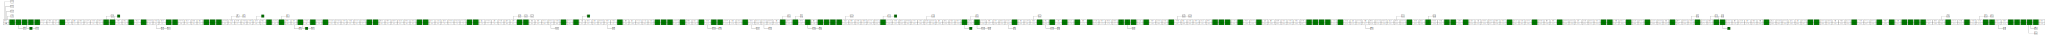

In [21]:
MIN_FORK_LENGTH = 0

fork_paths = [[y] for y in df_leafs['HASH']]
df_roots.apply(lambda row : fork_paths.extend(nx.all_simple_paths(forks_nx, row['HASH'], list(df_leafs['HASH']))), axis = 1)

fork_paths_longer_than = paths_longer_than(fork_paths, MIN_FORK_LENGTH)

nodes_in_forks_longer_than = nodes_in_paths(fork_paths_longer_than)

df_trimmed = df.query('HASH in @nodes_in_forks_longer_than or HASH in @mainchain_path')
bc_trimmed = create_digraph(df_trimmed)

# Do something cool? Idk, for example mainchain in blue or make it bigger
df_trimmed.query('HASH in @mainchain_path').apply(lambda row : bc_trimmed.node(row['HASH'], height='0.7', width='0.7'), axis = 1)
bc_trimmed.node(genesis, height='0.7', width='0.7')

# Do something cool? Idk, for example color blocks sealed by prefered sealer in green. 
df_trimmed.query('DIFF==2').apply(lambda row : bc_trimmed.node(row['HASH'], style='filled', fillcolor='green'), axis = 1)

# Do something cool? Idk, for example try to make mainchain at same level
df_trimmed.query('HASH in @mainchain_path').apply(lambda row : bc_trimmed.node(row['HASH'], group='main'), axis = 1)
bc_trimmed.node(genesis, group='main')

# # Do something cool? Idk, for example try to keep all forks at same level (very slow!)
df_trimmed.query('HASH in @nodes_in_forks_longer_than').apply(lambda row : bc_trimmed.node(row['HASH'], group='forks'), axis = 1)

bc_trimmed
# display(df_trimmed)
# bc_trimmed.render('test-output/blockchain.gv', view=True)

In [28]:
# Select which experiment to plot the whole blockchain
tic()
EXP = 'test'
NREP = ['007']
ID = range(1,100)
# ID=[]

# Collect data
df = create_df(EXP, 'block')
df = df.query("NREP in @NREP")
df = df.query("ID in @ID")

# Remove duplicate blocks
df = df.drop_duplicates('HASH').sort_values('BLOCK')
genesis = df['PHASH'].iloc[0]

bc = create_digraph(df)
bc_nx = convert_digraph(bc)

# mainchain_path is the longest path extracted with nx
mainchain_path = get_mainchain(bc_nx, source=genesis, target=str(df['HASH'].iloc[-1]))

# Do something cool? Idk, for example mainchain in blue or make it bigger
df.query('HASH in @mainchain_path').apply(lambda row : bc.node(row['HASH'], height='0.7', width='0.7'), axis = 1)
bc.node(genesis, height='0.7', width='0.7')

# Do something cool? Idk, for example color blocks sealed by prefered sealer in green. 
df.query('DIFF==2').apply(lambda row : bc.node(row['HASH'], style='filled', fillcolor='green'), axis = 1)

# Do something cool? Idk, for example try to make mainchain at same level
df.query('HASH in @mainchain_path').apply(lambda row : bc.node(row['HASH'], group='main'), axis = 1)
bc.node(genesis, group='main')

bc_trimmed.render('test-output/blockchain.gv', view=True)


'test-output/blockchain.gv.pdf'